/var/folders/wd/l4_k8xr54fd8k2hqpzq4y3l40000gn/T/ipykernel_11116/1575201850.py:13: RuntimeWarning: divide by zero encountered in divide
  return 1 / (1/R_in + 2*C*F_s)


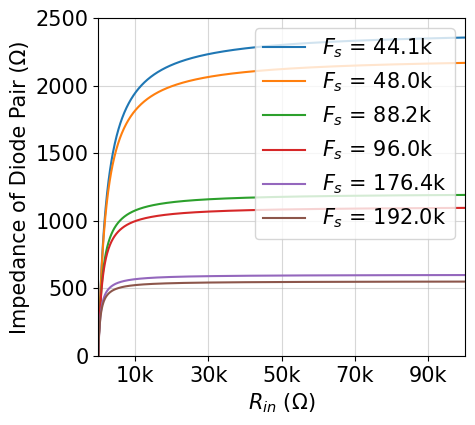

In [122]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 15

# 定义参数
C = 4.7 * 10**(-9)
F_s_values = [44100,48000,88200,96000,176400,192000]
R_in_values = np.linspace(0, 100e3, 1000) # 生成从10k到100k的1000个值

# 定义函数
def function(F_s, R_in):
    return 1 / (1/R_in + 2*C*F_s)

# 创建画布
plt.figure(figsize=[5, 4.5])


# 为每一个F_s值生成并绘制曲线
for F_s in F_s_values:
    y = function(F_s, R_in_values)
    plt.plot(R_in_values, y, label=f'$F_s$ = {F_s / 1000}k')

# 添加图例
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper right')

# 添加标签和标题
plt.xlabel(r'$R_{in}$ (Ω)')
plt.ylabel('Impedance of Diode Pair (Ω)')

plt.ylim(0, 2500)
yticks = np.arange(0, 2501, 500)
plt.yticks(yticks)

plt.xlim(0, 100e3)
xticks = np.arange(10e3, 100e3, 20e3)
plt.xticks(xticks, labels=[f'{int(x/1000)}k' for x in xticks])

# 展示图像
plt.grid(True, alpha=0.5)

# 自动调整布局并保存为PDF文件
plt.tight_layout()
plt.savefig('fig_diode_pair_impedance.pdf', format='pdf')

plt.show()

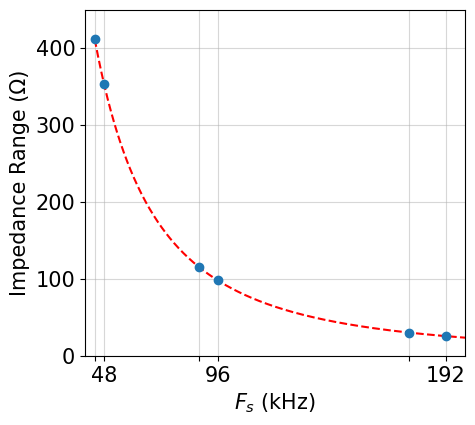

In [123]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 15

# 定义参数
C = 4.7 * 10**(-9)
F_s_values_specific = np.array([44100,48000,88200,96000,176400,192000])
F_s_values_continuous = np.linspace(44.1e3, 384e3, 1000)
R_in_10k = 10e3
R_in_100k = 100e3

# 定义函数
def function(F_s, R_in):
    return 1 / (1/R_in + 2*C*F_s)

# 计算函数在 Rin 为 100k 时的值和 Rin 为 10k 时的值的差
value_diff_specific = function(F_s_values_specific, R_in_100k) - function(F_s_values_specific, R_in_10k)
value_diff_continuous = function(F_s_values_continuous, R_in_100k) - function(F_s_values_continuous, R_in_10k)

# 创建画布
fig, ax = plt.subplots(figsize=[5, 4.5])

# 绘制连续的曲线和特定点的标记
ax.plot(F_s_values_continuous/1000, value_diff_continuous, color='red', linestyle='dashed', label='Continuous')
ax.plot(F_s_values_specific/1000, value_diff_specific, 'o', label='Specific Points')

# 添加图例
# ax.legend()

# 添加标签和标题
ax.set_xlim(40, 200)
ax.set_ylim(0, 450)
ax.set_xlabel('$F_s$ (kHz)')
ax.set_ylabel('Impedance Range (Ω)')

# ax.set_yticks(value_diff_specific)
# test = [str(round(val, 1)) for val in value_diff_specific]
# ax.set_yticklabels(test)
ax.set_xticks([44.1, 48, 88.2, 96, 176.4, 192])
ax.set_xticklabels(['', '48', '', '96', '', '192'])
ax.grid(True, alpha=0.5)

# 自动调整布局并保存为PDF文件
plt.tight_layout()
plt.savefig('fig_impedance_range.pdf', format='pdf')

# 展示图像
plt.show()